# Ultimate Data Science Challenge

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression as LinR, LogisticRegression as LogR
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold,GridSearchCV as GSCV, RandomizedSearchCV as RSCV
from sklearn.ensemble import RandomForestClassifier as RFC,RandomForestRegressor as RFR
import sklearn.model_selection
from sklearn import svm 
import category_encoders as ce
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pickle 
import os
from itertools import cycle
from scipy import interp
import json
import datetime
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')

# Part 1

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [306]:
# Import json file
json_file1 = 'logins.json'
df1 = pd.read_json(json_file1)
df1=df1.set_index(df1.login_time)
df1['Count'] =1
df1 = df1.drop("login_time",axis=1)
df1.head(3)

,Count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
Count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [81]:
print('First date: ',df1.index.min())
print('Last date:  ',df1.index.max())

First date:  1970-01-01 20:12:16
Last date:   1970-04-13 18:57:38


In [73]:
def get_weekdays(x):
    """Get weekdays from weekday numbers"""
    days = []
    for i in x:
        days.append(weekDays[i])
    return days

In [336]:
# Add day of the week to each row
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
daynums = list(map(lambda x: x.weekday(),df1.index))
df1['weekday'] = get_weekdays(daynums)
df1.head(3)

,Count,weekday
login_time,,
1970-01-01 20:13:18,1,Thursday
1970-01-01 20:16:10,1,Thursday
1970-01-01 20:16:37,1,Thursday


Text(0.5,0,'Date (resampled by day)')

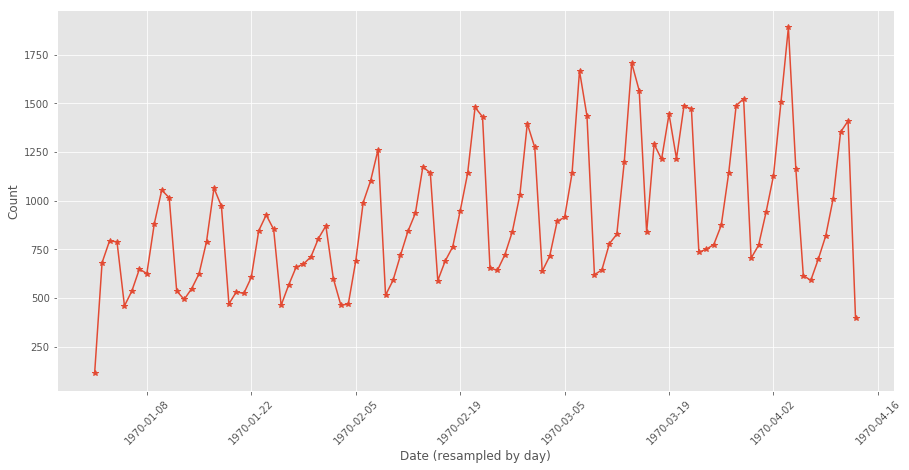

In [412]:
# Resample by day
fig, ax = plt.subplots(figsize=(15, 7))
df2 = df1.resample("1D").sum()
plt.plot(df2.Count,Marker='*')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by day)')

[datetime.date(1970, 1, 2), datetime.date(1970, 1, 28), 0, 2000]

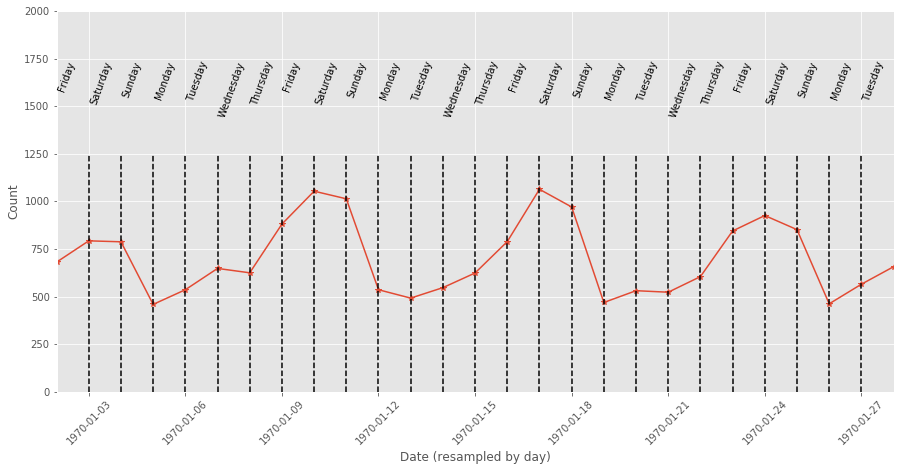

In [324]:
# Resample by day, zooming in and showing days of the week
fig, ax = plt.subplots(figsize=(15, 7))
df2 = df1.resample("1D").sum()
plt.plot(df2.Count,Marker='*')

for i in range(2,28):
    tmpdate = dt.strptime('01/'+str(i)+'/1970','%m/%d/%Y').date()
    plt.plot([tmpdate,tmpdate],[0,1250],'--',color='k')
    text = get_weekdays([tmpdate.weekday()])
    plt.text(tmpdate,1700,text[0],rotation=70)
    
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by day)')
plt.axis([dt.strptime('01/02/1970','%m/%d/%Y').date(),dt.strptime('01/28/1970','%m/%d/%Y').date(),0,2000])

<div class="span5 alert alert-success">
<p> Above, we see that there is a cyclical pattern week to week, with the maximum for each week occuring on Saturday. Sunday and Friday are in 2nd and 3rd place, respectively.
   </p>
</div>

Text(0.5,0,'Date (resampled by week)')

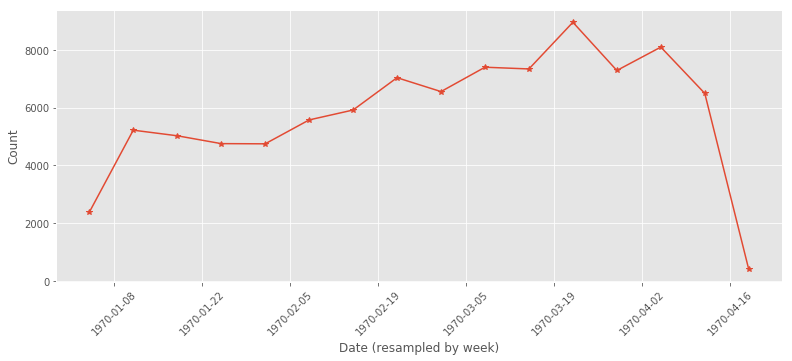

In [322]:
# Resample by week
fig, ax = plt.subplots(figsize=(13, 5))
dfweek = df1.resample("1W").sum()
plt.plot(dfweek.Count,Marker='*')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by week)')

<div class="span5 alert alert-success">
<p> Sampling by week, we see there is growth in the total count, peaking in March and then dropping off a bit.
   </p>
</div>

Text(0.5,0,'Date (resampled by 15 min)')

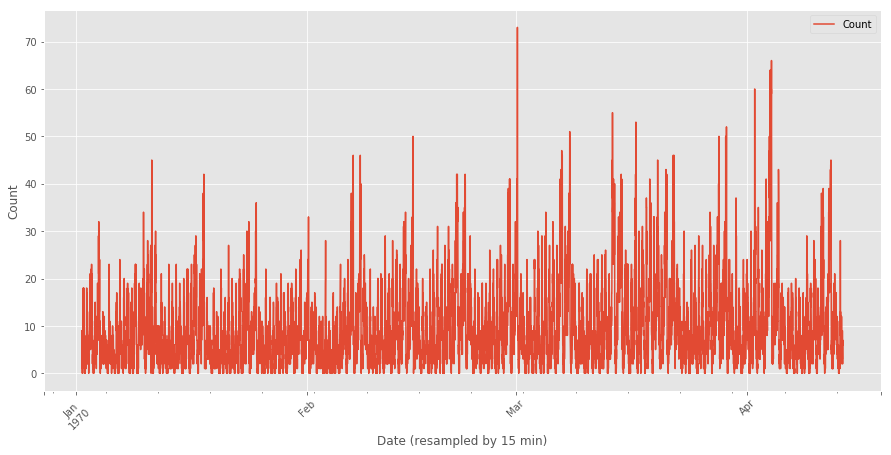

In [327]:
# Resample by 15 minutes
df15min = df1.resample("15Min").sum()
daynums = list(map(lambda x: x.weekday(),df15min.index))
df15min['weekday'] = get_weekdays(daynums)
df15min.plot(figsize=(15, 7))
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by 15 min)')

[datetime.date(1970, 1, 2), datetime.date(1970, 1, 10), 0, 30]

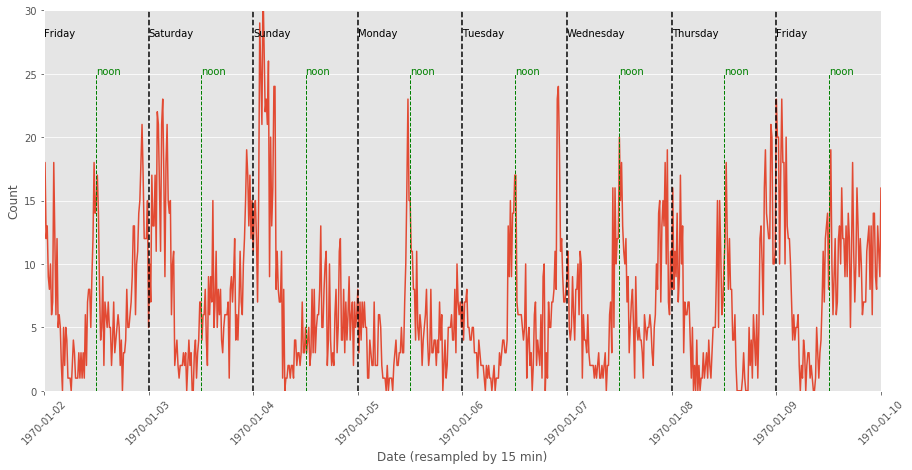

In [328]:
# Zoom in to just one week
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(df15min.index,df15min.Count.values)
plt.xticks(rotation=45)
for i in range(2,10):
    tmpdate = dt.strptime('01/0'+str(i)+'/1970','%m/%d/%Y').date()
    tmpdatenoon = dt.strptime('01/0'+str(i)+'/1970/12','%m/%d/%Y/%H')
    plt.plot([tmpdatenoon,tmpdatenoon],[0,25],'--',color='g',LineWidth=1)
    plt.plot([tmpdate,tmpdate],[0,30],'--',color='k')
    text = get_weekdays([tmpdate.weekday()])
    plt.text(tmpdate,28,text[0])
    plt.text(tmpdatenoon,25,'noon',color='g')
plt.ylabel('Count')
plt.xlabel('Date (resampled by 15 min)')
plt.axis([dt.strptime('01/02/1970','%m/%d/%Y').date(),dt.strptime('01/10/1970','%m/%d/%Y').date(),0,30])

<div class="span5 alert alert-success">
<p> We can dig into the weekly pattern in more detail. For this week, above, we see the weekly peak a bit after midnight on Sunday morning. The rest of the week, we see local peaks around midnight and noon on each day. The exceptions would be Sunday and Monday nights at midnight, where there is no increase in the total count.
    
Below is a histogram of the counts, grouped by weekday. We can see the pattern as above, with a peak around Saturday or Sunday, a minimum on Monday, and slow rise through the week.
   </p>
</div>

Text(0,0.5,'Count')

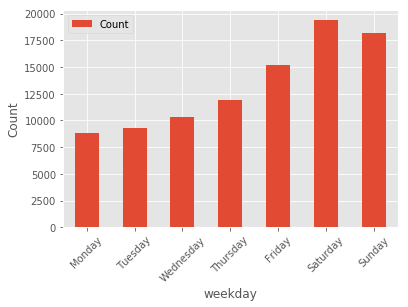

In [338]:
# Group by weekday
dfD = df1.groupby('weekday').sum()
new_index= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dfD2 = dfD.reindex(new_index)
dfD2.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Count')

In [467]:
def test_stationarity(dfin,window,show_calcs=0):
    """Plot the rolling average and standard deviation, and perform a Dickey-Fuller test 
    https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/"""

    dfin = dfin.Count
    
    #Determing rolling statistics
    rolmean = dfin.rolling(window).mean() 
    rolstd = dfin.rolling(window).std() 

    #Plot rolling statistics:
    orig = dfin.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    if show_calcs:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(dfin, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], 
                             index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        

<div class="span5 alert alert-success">
<p> Below, we see the rolling average and standard deviation for the data, plotted along with the resampled-by-day data. The counts appear to decrease slightly in January, and then increase to a peak around mid-March. The data then drops a bit, though we would need more data to know for sure if this is a long-term downward trend. Note that the standard deviation also appears to increase over time.
   </p>
</div>

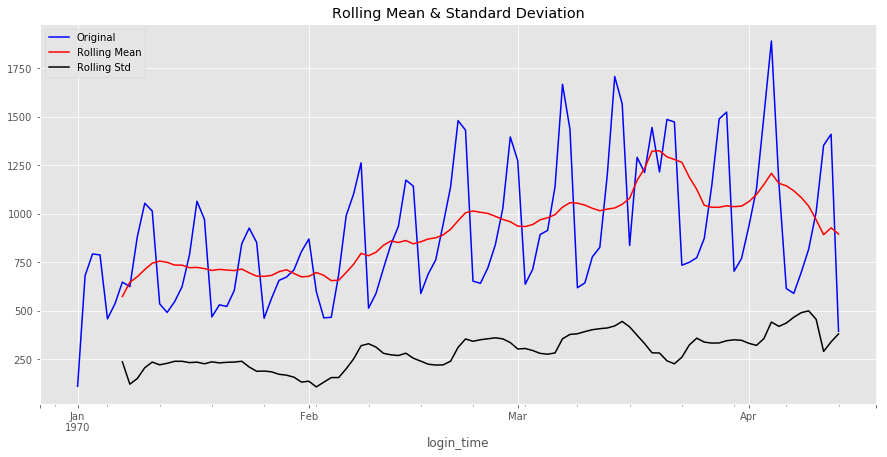

Results of Dickey-Fuller Test:
Test Statistic                 -1.403316
p-value                         0.580685
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [468]:
# Calculate rolling average from daily-resample, with weekly window size
fig = plt.figure(figsize=(15, 7))
winsize = 7
test_stationarity(df2,winsize,1)

<div class="span5 alert alert-success">
<p> Overall, we can make the following conclusions:
    
   1) There is a long-term trend upwards, peaking mid-march. 
    
   2) The moving standard deviation also has a slight upward trend.
    
   3) Each week starting on Monday, the total count increases steadily, peaking between Saturday and Sunday.
    
   4) On most days, the maxima are around midnight and noon.
   </p>
</div>

# Part 2


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

# Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [22]:
def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])
def run_logR(X, Xtest, y, ytest,solver):
    """Runs Logistic regression model"""
    y=y[:,0]
    mod = LogR(solver=solver,max_iter=1000)
    mod.fit(X,y)
    print(accuracy_score(mod.predict(Xtest), ytest))
    return mod
def run_model(model,X, Xtest, y, ytest,**kwargs):
    """Runs generic model"""
    mod = model(**kwargs)
    mod.fit(X,y)
    print(mod)
    print('Traning AUC = ',roc_auc_score(y, mod.predict(X) ))
    print('Testing AUC = ',roc_auc_score(ytest, mod.predict(Xtest) ))
    return mod
def cv_score(clf, x, y, score_func=accuracy_score):
    """Does cross-validation for input model"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func( y[test],clf.predict(x[test])) # evaluate score function on held-out data
    return result / nfold # average
def do_precision_recall_curve(y_actual,y_predicted):
    """Displays precision/recall vs. threshold curve"""
    precision, recall, thresholds = precision_recall_curve(y_actual, y_predicted) 
    pr_auc = metrics.auc(recall, precision)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
def calc_auc_vs_threshold(y_actual,y_pred):
    """Displays ROC AUC vs. threshold"""
    pred_proba_df = pd.DataFrame(y_pred)
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5] # ,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    aucs = []
    accs = []
    for i in threshold_list:
        print ('******** For i = {} ******'.format(i))
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        accuracy = metrics.accuracy_score(y_actual, Y_test_pred)
        auc = metrics.roc_auc_score(y_actual, Y_test_pred)
        aucs.append(auc)
        accs.append(accuracy)
        #print('Accuracy is {}'.format(accuracy))        
        #print('AUC is {}'.format(auc))
        print(confusion_matrix(y_actual,Y_test_pred))
    plt.plot(threshold_list,aucs,marker='o',color='r')
    plt.plot(threshold_list,accs,marker='o',color='b')
    plt.legend(['AUC','Accuracy'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    #plt.show()
def do_auc_prec_recall(y_actual,y_pred,show_confusion):
    """Displays Precision, Recall, AUC, Accuracy vs. Threshold"""
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred) 
    pr_auc = metrics.auc(recall, precision)
    #plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    #plt.ylabel("Precision, Recall")
    #plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    pred_proba_df = pd.DataFrame(y_pred)
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,.55,.6,.65,.7,.75,.8,.85] # ,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    aucs = []
    accs = []
    for i in threshold_list:
        
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        accuracy = metrics.accuracy_score(y_actual, Y_test_pred)
        auc = metrics.roc_auc_score(y_actual, Y_test_pred)
        aucs.append(auc)
        accs.append(accuracy)
        if show_confusion == 1:
            print ('******** For i = {} ******'.format(i))
            print(confusion_matrix(y_actual,Y_test_pred))
    plt.plot(threshold_list,aucs,marker='o',color='r')
    plt.plot(threshold_list,accs,marker='o',color='b')
    plt.legend(['AUC','Accuracy'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.legend(['Precision','Recall','AUC','Accuracy'])


def get_metrics(mod,Xtrain,Xtest,ytrain,ytest,thresh):
    """Display ROC AUC and confusion matrix for input model"""
    
    #Training SET
    print('TRAINING SET')
    y_pred2 = mod.predict_proba(Xtrain)[:,1]
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print('AUC = ' , roc_auc_score(ytrain, y_pred2))
    print(confusion_matrix(ytrain,y_pred2))

    #TESTING SET
    print('TEST SET')
    y_pred2 = mod.predict_proba(Xtest)[:,1]
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print('AUC = ' , roc_auc_score(ytest, y_pred2))
    print(confusion_matrix(ytest,y_pred2))    
    return 
def cv_score(clf, x, y, score_func=accuracy_score):
    """Cross validation for input model"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        y_prob_tmp = mod.predict(x[test])
        result += score_func(y[test],y_prob_tmp ) # evaluate score function on held-out data
    return result / nfold # average
def cv_score_prob(clf, x, y,thresh, score_func):
    """Cross validation for input model, with variable threshold"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        y_prob_tmp = clf.predict_proba(x[test])[:,1]
        y_prob_tmp[y_prob_tmp>thresh]=1
        y_prob_tmp[y_prob_tmp<1]=0
        try:
            result += score_func(y[test],y_prob_tmp ) # evaluate score function on held-out data
        except:
            result += 0
            print('AUC 0')
    return result / nfold # average
def my_makedir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

In [23]:
json_file2 = 'ultimate_data_challenge.json'

In [24]:
with open(json_file2, 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [25]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [27]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [28]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [29]:
df.phone.isnull().value_counts()

False    49604
True       396
Name: phone, dtype: int64

In [30]:
for i,j in enumerate(df.phone):
    if j is None:
        df.iloc[i,6] = "None"

In [31]:
df.phone.value_counts()

iPhone     34582
Android    15022
None         396
Name: phone, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [33]:
df[df.avg_rating_of_driver.isnull()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
9,2.37,5.0,NaN,1.0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
12,20.29,5.0,NaN,1.0,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0
14,26.01,5.0,NaN,1.0,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
15,13.20,5.0,NaN,1.0,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0


In [34]:
df['no_of_rating'] = 0
df['no_by_rating'] = 0

In [35]:
df.loc[df.avg_rating_of_driver.isnull(),'no_of_rating'] = 1
df.loc[df.avg_rating_by_driver.isnull(),'no_by_rating'] = 1

In [36]:
df.no_of_rating.value_counts()

0    41878
1     8122
Name: no_of_rating, dtype: int64

In [37]:
df.no_by_rating.value_counts()

0    49799
1      201
Name: no_by_rating, dtype: int64

In [38]:
avgof = df.avg_rating_of_driver.mean()
avgby = df.avg_rating_by_driver.mean()

In [39]:
print(avgof)
print(avgby)

4.6015592912744685
4.778158195947439


In [40]:
df.loc[df.avg_rating_of_driver.isnull(),'avg_rating_of_driver'] = avgof
df.loc[df.avg_rating_by_driver.isnull(),'avg_rating_by_driver'] = avgby

In [41]:
df['last_trip_date'] = pd.to_datetime(df.last_trip_date.astype(str) ,format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df['signup_date'],format='%Y-%m-%d')

In [42]:
df.ultimate_black_user = df.ultimate_black_user.astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
no_of_rating              50000 non-null int64
no_by_rating              50000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(2)
memory usage: 5.3+ MB


In [44]:
# Signup + 6 months - last trip date
df['days_since_trip'] = (df['signup_date'] + timedelta(6*365/12) - df['last_trip_date']).dt.days

In [45]:
df['is_active'] = (df['days_since_trip'] <= 30).astype(int)

In [46]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,no_of_rating,no_by_rating,days_since_trip,is_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,0,39,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0,0,86,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0,0,181,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,0,12,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,135,0


In [47]:
y = df['is_active']
df = df.drop('is_active',axis=1)

In [48]:
y.value_counts()

0    38306
1    11694
Name: is_active, dtype: int64

In [49]:
# Use OneHotEncoding to make categorical features into their own binary columns
encoder = ce.OneHotEncoder(cols=['city','phone','ultimate_black_user'])
Xpre = df.drop(['last_trip_date','signup_date','days_since_trip'],axis=1)
Xpre.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,no_of_rating,no_by_rating
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,1,46.2,0,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,0,50.0,0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,0,100.0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,1,80.0,0,0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,0,82.4,0,0


In [50]:
encoder.fit(Xpre, y)
X = encoder.transform(Xpre)
Xtr, Xte, ytr, yte = TTS(X.values,y.values,random_state=5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Traning AUC =  0.5650213119337548
Testing AUC =  0.5695417773638534
[[9180  382]
 [2412  526]]


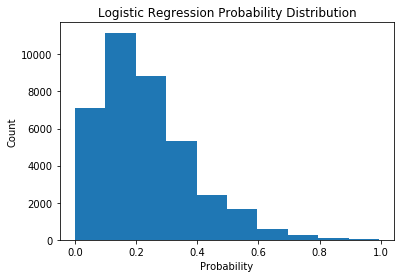

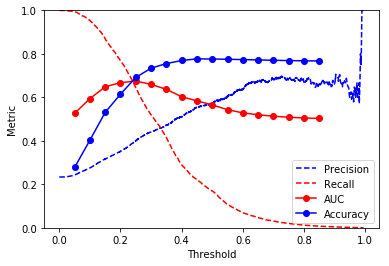

In [51]:
# Logistic Regression Classifier
mod = run_model(LogR,Xtr, Xte, ytr, yte,solver='lbfgs',max_iter=1000)
print(confusion_matrix(yte,mod.predict(Xte)))
#coeffs = pd.DataFrame(modbig2.coef_[0],index=X_cleaned2.columns,columns=['coeff'])
#coeffs.head()
#print(coeffs.sort_values(by=['coeff']))
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)

In [53]:
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
rfc = RFC() 
from scipy.stats import randint as sp_randint
param_grid = {"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": sp_randint(50,200)}
filename = 'mod_rscv1.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_rscv = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_rscv = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=10, cv=3,scoring='roc_auc',verbose=50)
    mod_rscv.fit(Xtr,ytr) 
    pickle.dump( mod_gscv2, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_rscv.best_score_)
print(mod_rscv.best_estimator_)
print(mod_rscv.best_params_)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.25)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=7, min_samples_split=3, n_estimators=174 ...........
[CV]  max_features=7, min_samples_split=3, n_estimators=174, score=0.7837563923277695, total=   5.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[CV] max_features=7, min_samples_split=3, n_estimators=174 ...........
[CV]  max_features=7, min_samples_split=3, n_estimators=174, score=0.7808386716901694, total=   5.7s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.2s remaining:    0.0s
[CV] max_features=7, min_samples_split=3, n_estimators=174 ...........
[CV]  max_features=7, min_samples_split=3, n_estimators=174, score=0.7797799062414983, total=   6.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.6s remaining:    0.0s
[CV] max_features=10, min_samples_split=7, n_estimators=71 ...........
[CV]  max_features=10, min_samp

AUC =  0.902001452115472
[[23560  5184]
 [  137  8619]]
TEST SET
AUC =  0.7281379137324407
[[6729 2833]
 [ 727 2211]]


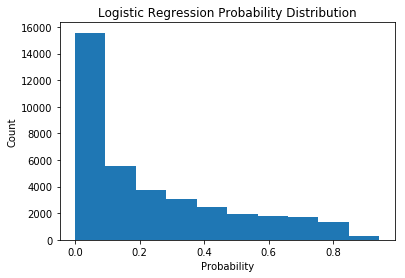

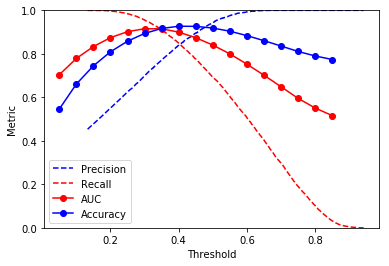

In [54]:
mod = mod_rscv.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)

In [57]:
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)

TRAINING SET
AUC =  0.9154008679762449
[[25151  3593]
 [  387  8369]]
TEST SET
AUC =  0.7245122975859316
[[7252 2310]
 [ 909 2029]]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=2, min_samples_split=2, n_estimators=136 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=136, score=0.7774234677916491, total=   3.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[CV] max_features=2, min_samples_split=2, n_estimators=136 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=136, score=0.7746691012555933, total=   3.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s
[CV] max_features=2, min_samples_split=2, n_estimators=136 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=136, score=0.7754041708805246, total=   3.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s remaining:    0.0s
[CV] max_features=7, min_samples_split=7, n_estimators=177 ...........
[CV]  max_features=7, min_sampl

[CV]  max_features=8, min_samples_split=2, n_estimators=147, score=0.7757994872047638, total=   5.8s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  2.0min remaining:    0.0s
[CV] max_features=6, min_samples_split=6, n_estimators=153 ...........
[CV]  max_features=6, min_samples_split=6, n_estimators=153, score=0.7924099578910984, total=   4.9s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  2.1min remaining:    0.0s
[CV] max_features=6, min_samples_split=6, n_estimators=153 ...........
[CV]  max_features=6, min_samples_split=6, n_estimators=153, score=0.7866363744705847, total=   4.7s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.1min remaining:    0.0s
[CV] max_features=6, min_samples_split=6, n_estimators=153 ...........
[CV]  max_features=6, min_samples_split=6, n_estimators=153, score=0.7874208106502767, total=   4.7s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.2min remaining:    0.0s
[CV] max_features=10, min_samples_split=7, n_estimators=168 ...

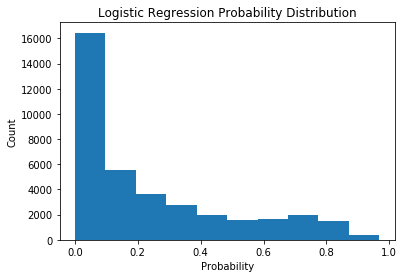

TRAINING SET
AUC =  0.9384902557215905
[[25766  2978]
 [  170  8586]]
TEST SET
AUC =  0.7195817728702322
[[7187 2375]
 [ 918 2020]]


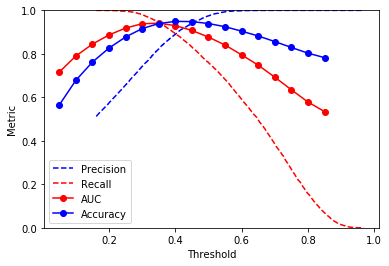

In [58]:
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
rfc = RFC() 
from scipy.stats import randint as sp_randint
param_grid = {"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": sp_randint(50,200)}
filename = 'mod_rscv2.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_rscv = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_rscv = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=20, cv=3,scoring='roc_auc',verbose=50)
    mod_rscv.fit(Xtr,ytr) 
    pickle.dump( mod_gscv2, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_rscv.best_score_)
print(mod_rscv.best_estimator_)
print(mod_rscv.best_params_)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)
mod = mod_rscv.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)

/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7417923072759254, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7338113763540586, total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7358373598821463, total=   0.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[CV] C=0.05 ..........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=0.05, score=0.7419088255650065, total=   0.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[CV] C=0.05 ..........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=0.05, score=0.7335263970075524, total=   0.2s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[CV] C=0.05 ..........................................................
[CV] ................. C=0.05, score=0.7359251364166814, total=   0.2s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s remaining:    0.0s
[CV] C=0.1 ...........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, score=0.741875646991129, total=   0.2s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s remaining:    0.0s
[CV] C=0.1 ...........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.1, score=0.7333597716932839, total=   0.2s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.7s remaining:    0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.7359110435256435, total=   0.2s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.9s remaining:    0.0s
[CV] C=1 .............................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=1, score=0.7419725370075172, total=   0.2s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[CV] C=1 .............................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=1, score=0.7335173506117347, total=   0.3s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.4s remaining:    0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7358094244813834, total=   0.2s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.6s remaining:    0.0s
[CV] C=10 ............................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=10, score=0.7417601297797077, total=   0.2s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.8s remaining:    0.0s
[CV] C=10 ............................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, score=0.733533011961016, total=   0.2s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.0s remaining:    0.0s
[CV] C=10 ............................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=10, score=0.7360233931975975, total=   0.3s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.3s remaining:    0.0s
[CV] C=100 ...........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=100, score=0.7417563757384825, total=   0.3s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.6s remaining:    0.0s
[CV] C=100 ...........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=100, score=0.7335344064647189, total=   0.3s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.0s remaining:    0.0s
[CV] C=100 ...........................................................


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=100, score=0.7360258612419672, total=   0.3s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.3s finished


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best ROC AUC score =  0.7371471733026406
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'C': 0.01}
TRAINING SET
AUC =  0.6582799109913355
[[23051  5693]
 [ 4250  4506]]
TEST SET
AUC =  0.6633855591020105
[[7668 1894]
 [1396 1542]]


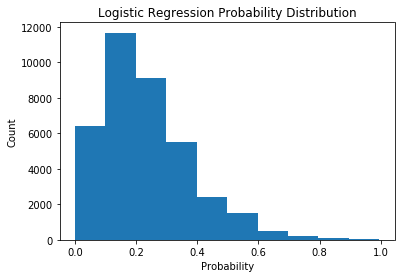

TRAINING SET
AUC =  0.6582799109913355
[[23051  5693]
 [ 4250  4506]]
TEST SET
AUC =  0.6633855591020105
[[7668 1894]
 [1396 1542]]


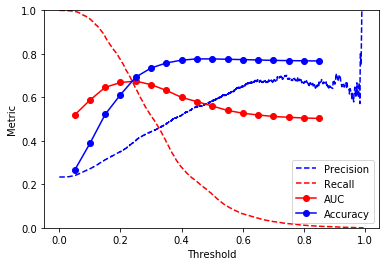

In [60]:
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
rfc = LogR() 
from scipy.stats import randint as sp_randint
param_grid = {"C": [0.01,.05,.1,1,10,100]}
filename = 'mod_logr1.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_rscv = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_rscv = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=30, cv=3,scoring='roc_auc',verbose=50)
    mod_rscv.fit(Xtr,ytr) 
    pickle.dump( mod_gscv2, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_rscv.best_score_)
print(mod_rscv.best_estimator_)
print(mod_rscv.best_params_)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)
mod = mod_rscv.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)